In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

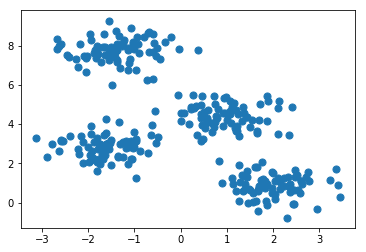

In [29]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

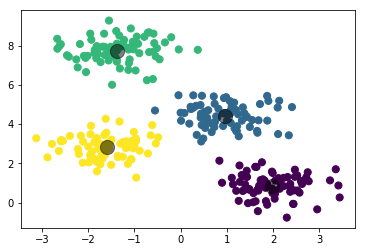

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

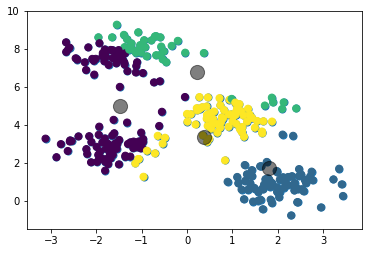

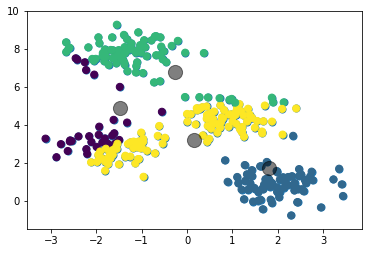

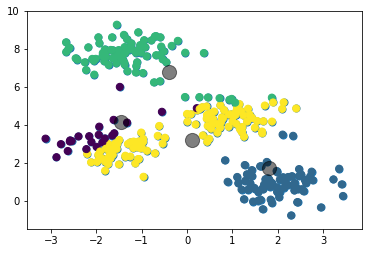

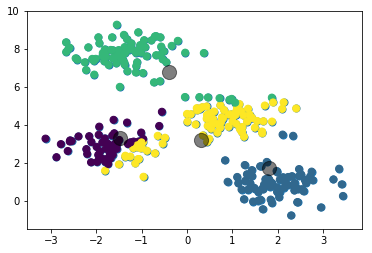

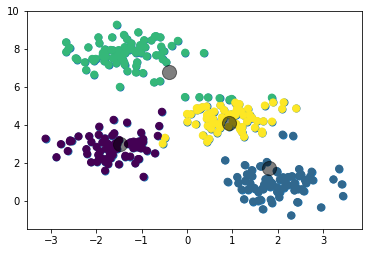

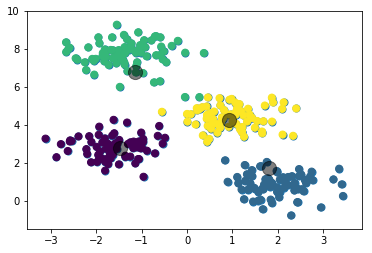

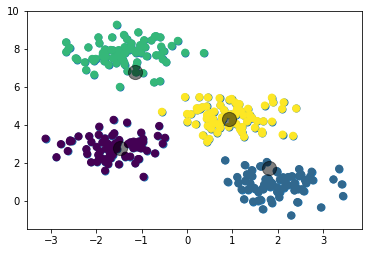

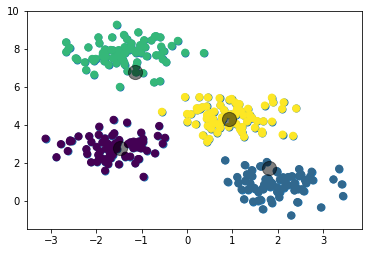

In [31]:
def dist(a,b):
    return (a[0]-b[0])**2+(a[1]-b[1])**2

min_dot, max_dot = [X[0][0],X[0][1]], [X[0][0],X[0][1]]
for i in X:
    min_dot[0] = min(min_dot[0],i[0])
    min_dot[1] = min(min_dot[1],i[1])
    max_dot[0] = max(max_dot[0],i[0])
    max_dot[1] = max(max_dot[1],i[1])
klusters = 4
centers = np.zeros((klusters,2))
for k in centers:
    k[0] = random.uniform(min_dot[0],max_dot[0])
    k[1] = random.uniform(min_dot[1],max_dot[1])
y = np.zeros(len(X))
y_prev = np.array([1 for i in range(len(X))])
while not np.array_equiv(y,y_prev):
    y_prev = np.copy(y)
    for i in range(len(X)):
        distances = [dist(X[i],centers[k]) for k in range(klusters)] 
        y[i] = distances.index(min(distances))
    for k in range(klusters):
        p, = np.where(y == k)
        min_d, max_d = [(max_dot[0]+min_dot[0])/2,(max_dot[1]+min_dot[1])/2],[(max_dot[0]+min_dot[0])/2,(max_dot[1]+min_dot[1])/2]
        for i in p:
            min_d[0] = min(min_d[0],X[i][0])
            min_d[1] = min(min_d[1],X[i][1])
            max_d[0] = max(max_d[0],X[i][0])
            max_d[1] = max(max_d[1],X[i][1])
            centers[k] = np.array([(max_d[0]+min_d[0])/2,(max_d[1]+min_d[1])/2])
    plt.scatter(X[:, 0], X[:, 1], s=50)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.show()

#plt.scatter(X[:, 0], X[:, 1], s=50)
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
#plt.show()